# Instalação de pacotes, input dos datasets e join dos datasets

Instalação dos pacotes que serão utilizados

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Leitura dos arquivos em csv, com separador ;

In [3]:
contratos = pd.read_csv("C:/Users/cvp14050/Desktop/INGLÊS/SERASA/BASE_CONTRATOS.csv", sep=';', parse_dates=['DATA_REFERENCIA', 'DATA_CONTRATACAO'])
parcelas = pd.read_csv("C:/Users/cvp14050/Desktop/INGLÊS/SERASA/BASE_PARCELAS.csv", sep=';', parse_dates=['DATA_REFERENCIA', 'DATA_VENCIMENTO', 'DATA_PAGAMENTO'])
referencia = pd.read_csv("C:/Users/cvp14050/Desktop/INGLÊS/SERASA/BASE_REFERENCIA.csv", sep=';', parse_dates=['DATA_REFERENCIA'])

c:\Users\cvp14050\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '24/05/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\cvp14050\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\cvp14050\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17/08/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\cvp14050\Anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '23/10/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  retur

Verificando se os arquivos foram lidos corretamente


In [4]:
print(contratos.head())
print(parcelas.head())
print(referencia.head())

                       ID_DOCUMENTO DATA_REFERENCIA  \
0  025592437298a5a7d9080f7f51ab4bf9      2023-05-24   
1  025592437298a5a7d9080f7f51ab4bf9      2023-05-24   
2  04cb711c72066d7a07ac1bc91bc59cd7      2023-05-24   
3  04cb711c72066d7a07ac1bc91bc59cd7      2023-05-24   
4  04cb711c72066d7a07ac1bc91bc59cd7      2023-05-24   

                        ID_CONTRATO TIPO_CONTRATO DATA_CONTRATACAO  \
0  27aae2a3a6ecd7a8225e30facad77806        CARTAO       2019-09-17   
1  3a4b29ae108abcf36063455105e2e314        CARTAO       2020-06-08   
2  adfed34d7b7610aa88f59f87e55a0508        CARTAO       2006-08-17   
3  e8ed8a5383fc9aa6b7a1bfd54ef018dd        CARTAO       2012-10-23   
4  9fce9a0ee5f23373e30ab8cd9906590f        CARTAO       2018-02-11   

   VALOR_CONTRATADO  TOTAL_PARCELAS_CONTRATO  
0               NaN                      NaN  
1               NaN                      NaN  
2               NaN                      NaN  
3               NaN                      NaN  
4            

**Junção das bases**

Foi utilizada a função merge do pandas para fazer um left join dos datasets contrato e referência (gerando um dataset chamado *base*), utilizando como chave as colunas *ID_DOCUMENTO* e *DATA_REFERENCIA*.
Depois, foi feito novamente o left join dos datasets *base* e *parcelas*, utilizando como chaves as colunas *ID_DOCUMENTO*, *DATA_REFERENCIA*, *ID_CONTRATO* e *TIPO_CONTRATO*.

In [5]:

base = pd.merge(contratos, referencia, how='left', on=['ID_DOCUMENTO', 'DATA_REFERENCIA'])
base = pd.merge(base, parcelas, how='left', on=['ID_DOCUMENTO', 'DATA_REFERENCIA', 'ID_CONTRATO', 'TIPO_CONTRATO'])

base.shape

(1838, 11)

A base resultante possui 1838 linhas e 11 colunas.



# Análise exploratória dos dados

#### TOTAL PARCELAS CONTRATO

In [7]:
print(base['TOTAL_PARCELAS_CONTRATO'].describe())

count       407.000000
mean       4944.056511
std       70011.398812
min           1.000000
25%          14.000000
50%          24.000000
75%          48.000000
max      999999.000000
Name: TOTAL_PARCELAS_CONTRATO, dtype: float64


De acordo com as medidas resumo, foi identificado a existência de pelo menos um valor atípico no que tange ao total de parcelas do contrato. Um contrato com 999.999 parcelas mensais levaria 83.333,25 anos para ser quitado, o que torna inviável que esse acordo seja, de fato, quitado.
Para seguir com a análise, as linhas com essa quantidade de parcelas serão retiradas da base, assumindo a hipótese de que houve erro de digitação.   

In [8]:
base2 = base[base['TOTAL_PARCELAS_CONTRATO'] != 999999]

base2.shape

(1836, 11)

Duas linhas possuíam o total de parcelas igual a 999.999, restando 1836 linhas na base.

In [158]:
emprestimo=base2[base2['TIPO_CONTRATO'] == 'EMPRESTIMO']
cartao=base2[base2['TIPO_CONTRATO'] == 'CARTAO']

emprestimo['ATRASO']=emprestimo['DATA_PAGAMENTO']-emprestimo['DATA_VENCIMENTO']
emprestimo['MAX_POSSIVEL_PARCELAS_PAGAS'] = ((emprestimo['DATA_REFERENCIA'] - emprestimo['DATA_CONTRATACAO'])/np.timedelta64(1 , 'M')).astype(int)



C:\Users\cvp14050\AppData\Local\Temp\ipykernel_10948\1053680823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emprestimo['ATRASO']=emprestimo['DATA_PAGAMENTO']-emprestimo['DATA_VENCIMENTO']
C:\Users\cvp14050\AppData\Local\Temp\ipykernel_10948\1053680823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emprestimo['MAX_POSSIVEL_PARCELAS_PAGAS'] = ((emprestimo['DATA_REFERENCIA'] - emprestimo['DATA_CONTRATACAO'])/np.timedelta64(1 , 'M')).astype(int)


In [176]:
emprestimo2=emprestimo.groupby(by=['ID_DOCUMENTO','ID_CONTRATO','TOTAL_PARCELAS_CONTRATO',
 'DATA_CONTRATACAO','MAX_POSSIVEL_PARCELAS_PAGAS','VALOR_CONTRATADO']).agg({'DATA_VENCIMENTO': ['max'] , 'DATA_PAGAMENTO': ['max'],'ATRASO': ['max'], 'VALOR_PAGAMENTO': ['sum'], 'ID_CONTRATO':['count']}).reset_index()

emprestimo2

,ID_DOCUMENTO,ID_CONTRATO,TOTAL_PARCELAS_CONTRATO,DATA_CONTRATACAO,MAX_POSSIVEL_PARCELAS_PAGAS,VALOR_CONTRATADO,DATA_VENCIMENTO,DATA_PAGAMENTO,ATRASO,VALOR_PAGAMENTO,ID_CONTRATO
,,,,,,,max,max,max,sum,count
0,04cb711c72066d7a07ac1bc91bc59cd7,cf174939ce4e3df74b1deabaac8297b2,6.0,2021-08-26,20,2039.17,NaT,NaT,NaT,0.00,1
1,09b2fd100a2166f1f4b06b48187965fa,09e544f9accb850bd86d267c93c15968,12.0,2022-04-29,12,180.34,2023-03-30,2023-06-02,123 days,182.72,12
2,09b2fd100a2166f1f4b06b48187965fa,6841969cecc06fe3eaed817fa28905c1,60.0,2022-07-02,10,5371.87,2027-05-03,2022-08-06,91 days,20181.68,58
3,09b2fd100a2166f1f4b06b48187965fa,e53950a7ce0938d1d8fdfdbeb4b2e041,24.0,2021-06-25,22,4485.75,2023-04-25,2022-07-02,38 days,4245.60,12
4,121e26cd99d9571c5b4d14eaf081acad,5ea2fc64b932c093273c337d24d1a20b,24.0,2022-10-14,7,3840.00,2023-09-01,2023-06-03,-30 days,960.00,6
...,...,...,...,...,...,...,...,...,...,...,...
69,d962412e78248a09992b1b8f62eadc2e,ed1e6a410a597b85f3c3b2961004b081,24.0,2021-07-27,21,7434.24,NaT,NaT,NaT,0.00,1
70,dd914aad2d2fd5cf4f8ab5172154e0b2,1f216493c6d9e2b04ab102447540830a,24.0,2021-11-16,18,1475.73,2023-05-16,2023-05-16,0 days,1355.42,12
71,dd914aad2d2fd5cf4f8ab5172154e0b2,2f83b242f6014468cebf15b4fbc0669c,24.0,2020-05-10,36,1500.00,2022-06-06,2021-11-16,-142 days,591.55,5


In [177]:
results = np.where(emprestimo2['MAX_POSSIVEL_PARCELAS_PAGAS'] < emprestimo2['TOTAL_PARCELAS_CONTRATO'], 
                   emprestimo2['MAX_POSSIVEL_PARCELAS_PAGAS'],
                   emprestimo2['TOTAL_PARCELAS_CONTRATO'])

emprestimo2['MAX_POSSIVEL_PARCELAS_PAGAS']=results

emprestimo2['EVER30MOB1'] = np.where(emprestimo2['ATRASO'] > '29 days', 1, 0)
  

In [178]:
emprestimo2['EXPOSURE_AT_DEFAULT'] = emprestimo2['VALOR_CONTRATADO'] - emprestimo2['VALOR_PAGAMENTO']['sum']

emprestimo2


,ID_DOCUMENTO,ID_CONTRATO,TOTAL_PARCELAS_CONTRATO,DATA_CONTRATACAO,MAX_POSSIVEL_PARCELAS_PAGAS,VALOR_CONTRATADO,DATA_VENCIMENTO,DATA_PAGAMENTO,ATRASO,VALOR_PAGAMENTO,ID_CONTRATO,EVER30MOB1,EXPOSURE_AT_DEFAULT
,,,,,,,max,max,max,sum,count,,
0,04cb711c72066d7a07ac1bc91bc59cd7,cf174939ce4e3df74b1deabaac8297b2,6.0,2021-08-26,6.0,2039.17,NaT,NaT,NaT,0.00,1,0,2039.17
1,09b2fd100a2166f1f4b06b48187965fa,09e544f9accb850bd86d267c93c15968,12.0,2022-04-29,12.0,180.34,2023-03-30,2023-06-02,123 days,182.72,12,1,-2.38
2,09b2fd100a2166f1f4b06b48187965fa,6841969cecc06fe3eaed817fa28905c1,60.0,2022-07-02,10.0,5371.87,2027-05-03,2022-08-06,91 days,20181.68,58,1,-14809.81
3,09b2fd100a2166f1f4b06b48187965fa,e53950a7ce0938d1d8fdfdbeb4b2e041,24.0,2021-06-25,22.0,4485.75,2023-04-25,2022-07-02,38 days,4245.60,12,1,240.15
4,121e26cd99d9571c5b4d14eaf081acad,5ea2fc64b932c093273c337d24d1a20b,24.0,2022-10-14,7.0,3840.00,2023-09-01,2023-06-03,-30 days,960.00,6,0,2880.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,d962412e78248a09992b1b8f62eadc2e,ed1e6a410a597b85f3c3b2961004b081,24.0,2021-07-27,21.0,7434.24,NaT,NaT,NaT,0.00,1,0,7434.24
70,dd914aad2d2fd5cf4f8ab5172154e0b2,1f216493c6d9e2b04ab102447540830a,24.0,2021-11-16,18.0,1475.73,2023-05-16,2023-05-16,0 days,1355.42,12,0,120.31
71,dd914aad2d2fd5cf4f8ab5172154e0b2,2f83b242f6014468cebf15b4fbc0669c,24.0,2020-05-10,24.0,1500.00,2022-06-06,2021-11-16,-142 days,591.55,5,0,908.45


### Empréstimo

#### Data da contratação

In [246]:
emprestimo2.DATA_CONTRATACAO.describe()

C:\Users\cvp14050\AppData\Local\Temp\ipykernel_10948\358742866.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  emprestimo2.DATA_CONTRATACAO.describe()


count                      74
unique                     67
top       2021-11-25 00:00:00
freq                        2
first     2014-10-14 00:00:00
last      2023-10-03 00:00:00
Name: DATA_CONTRATACAO, dtype: object

#### Total parcelas contrato

In [260]:

print(emprestimo2.TOTAL_PARCELAS_CONTRATO.describe())
print('CV:', np.std(emprestimo2.TOTAL_PARCELAS_CONTRATO)/np.mean(emprestimo2.TOTAL_PARCELAS_CONTRATO)*100)


count    74.000000
mean     16.662162
std      19.658925
min       1.000000
25%       1.000000
50%       9.000000
75%      24.000000
max      96.000000
Name: TOTAL_PARCELAS_CONTRATO, dtype: float64
CV: 117.18552913418927


O mínimo é de 1 parcela, o máximo é de 96. 

25% dos dados está concentrado em até 1 parcela; 50% em até 9 parcelas e 75% em até 24 parcelas. 

A média é de 16.67 parcelas.

O desvio padrão é de 19.66 parcelas e o CV é de 117.19%, indicando heterogeneidade.

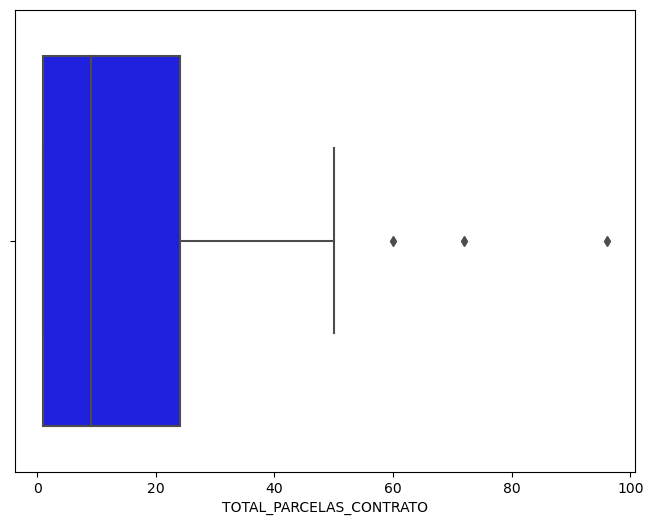

In [261]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=emprestimo2.TOTAL_PARCELAS_CONTRATO, color='blue')
plt.show()

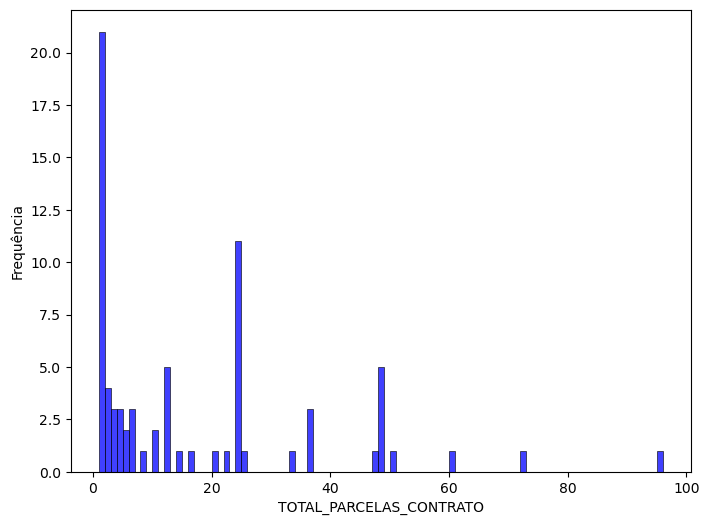

In [262]:
plt.figure(figsize=(8, 6))
sns.histplot(x=emprestimo2.TOTAL_PARCELAS_CONTRATO, color='blue', binwidth=1)
plt.ylabel('Frequência')
plt.show()

#### Valor contratado

In [263]:
print(emprestimo2.VALOR_CONTRATADO.describe())
print('CV:', np.std(emprestimo2.VALOR_CONTRATADO)/np.mean(emprestimo2.VALOR_CONTRATADO)*100)

count       74.00000
mean      3776.02027
std       6334.79057
min     -15023.34000
25%        238.04750
50%       1500.00000
75%       5314.05500
max      31743.86000
Name: VALOR_CONTRATADO, dtype: float64
CV: 166.62628619985077


O mínimo é de R\$ -15.023,34, o máximo é de R\$ 31.743.86. 

25% dos dados está concentrado em até R\$  238.05 ; 50\% em até R\$ 1500.00  e 75% em até R\$ 5314.06. 

A média é de R\$ 3776.02.

O desvio padrão é de R\$ 6334.79 e o CV é de 166.63%, indicando heterogeneidade.

c:\Users\cvp14050\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


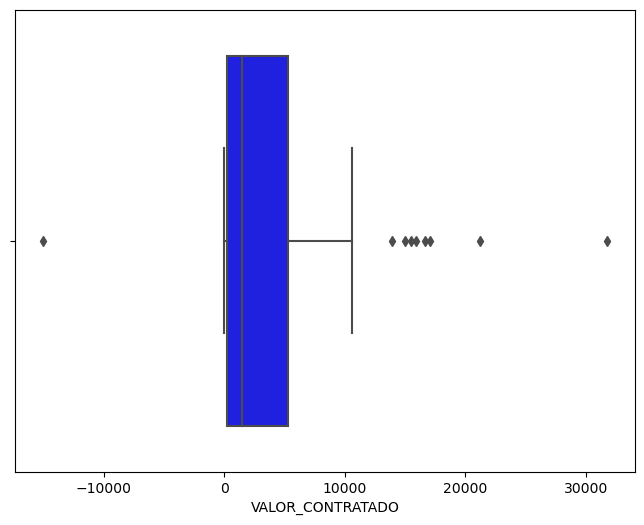

In [264]:
plt.figure(figsize=(8, 6))
sns.boxplot(emprestimo2.VALOR_CONTRATADO, color='blue')
plt.show()

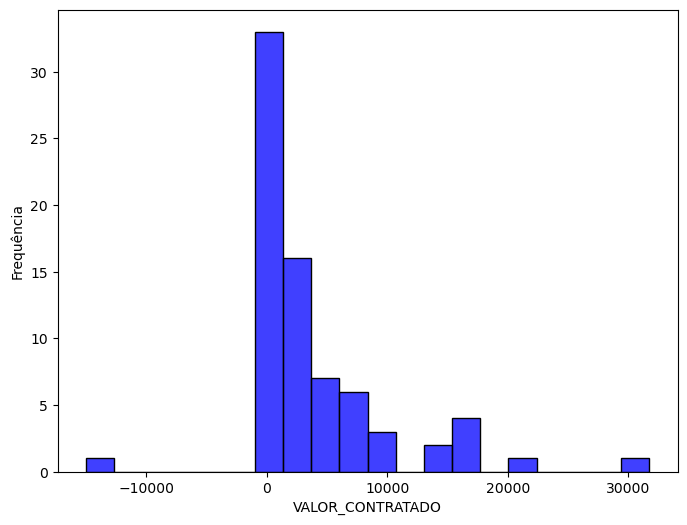

In [265]:
plt.figure(figsize=(8, 6))
sns.histplot(emprestimo2.VALOR_CONTRATADO, color='blue')
plt.ylabel("Frequência")
plt.show()

#### Atraso

In [200]:
print(emprestimo2['ATRASO'].describe())

                               max
count                           61
mean   -8 days +00:23:36.393442623
std    182 days 06:51:02.353502530
min           -1176 days +00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%               31 days 00:00:00
max              273 days 00:00:00


O mínimo é de -1176 dias, o máximo é de 273 dias. 

25% dos dados está concentrado em até 0 dias ; 50\% em até 0 dias  e 75% em até 31 dias. 

A média é de -8 dias.

O desvio padrão é de 182 dias, indicando heterogeneidade.

#### Valor pagamento

In [266]:
print(emprestimo2.VALOR_PAGAMENTO.describe())
print('CV:', np.std(emprestimo2.VALOR_PAGAMENTO)/np.mean(emprestimo2.VALOR_PAGAMENTO)*100)

                sum
count     74.000000
mean    2410.862973
std     5774.814508
min        0.000000
25%      111.297500
50%      389.050000
75%     1421.275000
max    35895.350000
CV: sum    237.909115
dtype: float64


c:\Users\cvp14050\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


O mínimo é de R\$ 0.00, o máximo é de R\$ 35895.35. 

25% dos dados está concentrado em até R\$  111.30 ; 50\% em até R\$ 389.05  e 75% em até R\$ 1421.28. 

A média é de R\$ 2410.86.

O desvio padrão é de R\$ 5774.81 e o CV é de 237.91%, indicando heterogeneidade.

c:\Users\cvp14050\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


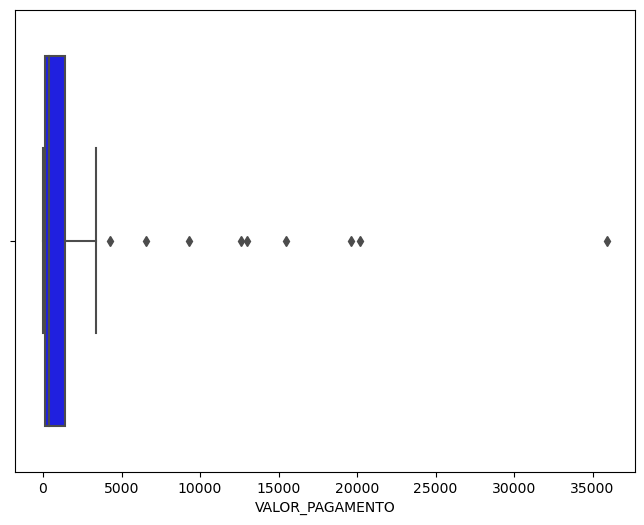

In [269]:
plt.figure(figsize=(8, 6))
sns.boxplot(emprestimo2.VALOR_PAGAMENTO['sum'], color='blue')
plt.xlabel("VALOR_PAGAMENTO")
plt.show()

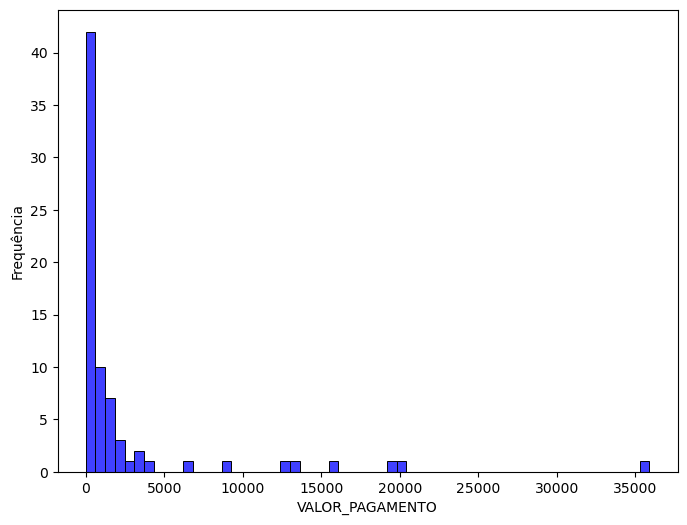

In [270]:
plt.figure(figsize=(8, 6))
sns.histplot(x=emprestimo2.VALOR_PAGAMENTO['sum'], color='blue')
plt.ylabel('Frequência')
plt.xlabel("VALOR_PAGAMENTO")
plt.show()

#### EVER30MOB1

In [238]:
tabela_freq = pd.DataFrame({'EVER30MOB1': emprestimo2.EVER30MOB1.value_counts().index, 'FREQ': emprestimo2.EVER30MOB1.value_counts().values})

print(tabela_freq)



   EVER30MOB1  FREQ
0           0    58
1           1    16


(0.0, 1.0)

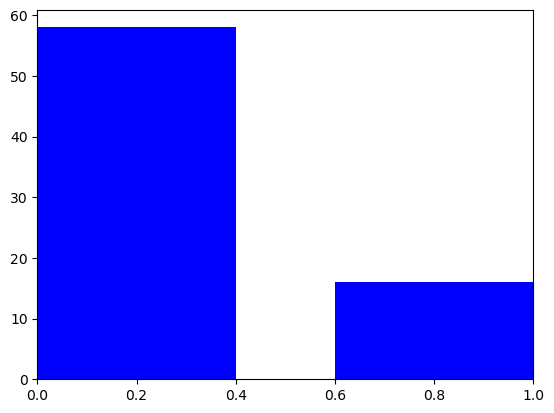

In [271]:
plt.bar(tabela_freq.EVER30MOB1, tabela_freq.FREQ, color='blue')
plt.xlim(0,1)

#### EXPOSURE AT DEFAULT

In [272]:
print(emprestimo2.EXPOSURE_AT_DEFAULT.describe())
print('CV:', np.std(emprestimo2.EXPOSURE_AT_DEFAULT)/np.mean(emprestimo2.EXPOSURE_AT_DEFAULT)*100)

count       74.000000
mean      1365.157297
std       4747.251630
min     -15203.640000
25%          0.000000
50%        169.480000
75%       1927.417500
max      19002.140000
Name: EXPOSURE_AT_DEFAULT, dtype: float64
CV: 345.38631638916047


O mínimo é de R\$ -15203.64, o máximo é de R\$ 19002.14. 

25% dos dados está concentrado em até R\$  0.00 ; 50\% em até R\$ 169.48  e 75% em até R\$ 1927.42. 

A média é de R\$ 1365.16.

O desvio padrão é de R\$ 4747.25 e o CV é de 345.39%, indicando heterogeneidade.

c:\Users\cvp14050\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


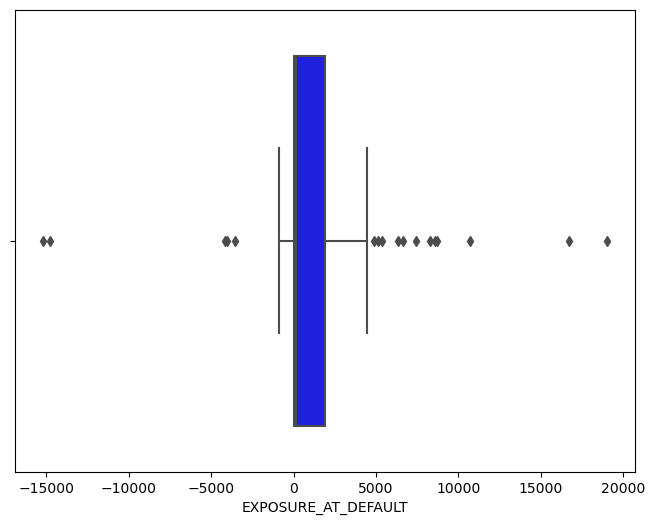

In [273]:
plt.figure(figsize=(8, 6))
sns.boxplot(emprestimo2.EXPOSURE_AT_DEFAULT, color='blue')
plt.xlabel('EXPOSURE_AT_DEFAULT')
plt.show()

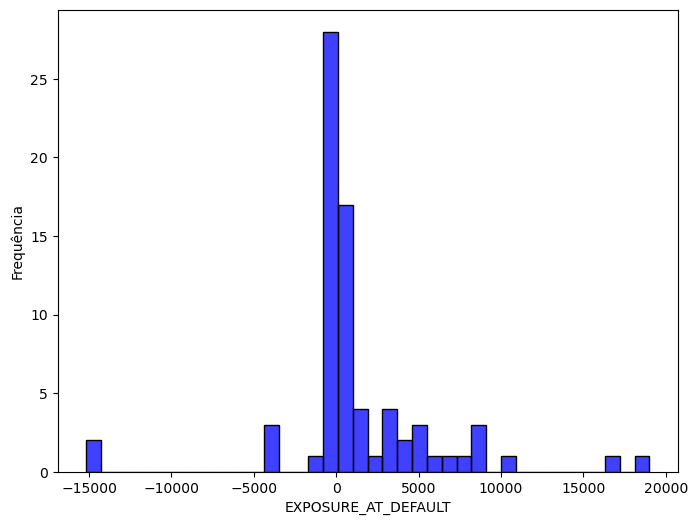

In [274]:
plt.figure(figsize=(8, 6))
sns.histplot(emprestimo2.EXPOSURE_AT_DEFAULT, color='blue')
plt.ylabel('Frequência')
plt.show()

### CARTAO


In [240]:
cartao.describe()

,VALOR_CONTRATADO,TOTAL_PARCELAS_CONTRATO,VALOR,VALOR_PAGAMENTO
count,0.0,0.0,1380.000000,1280.000000
mean,NaN,NaN,1520.282449,1361.621164
std,NaN,NaN,3243.429397,2564.694815
min,NaN,NaN,3.000000,0.020000
25%,NaN,NaN,190.045000,156.990000
50%,NaN,NaN,591.825000,520.210000
75%,NaN,NaN,1620.352500,1413.315000
max,NaN,NaN,48649.990000,26689.950000


In [245]:
cartao.DATA_CONTRATACAO.describe()


C:\Users\cvp14050\AppData\Local\Temp\ipykernel_10948\3953866429.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cartao.DATA_CONTRATACAO.describe()


count                    1431
unique                    210
top       2021-10-27 00:00:00
freq                       29
first     1730-09-14 00:00:00
last      2023-11-04 00:00:00
Name: DATA_CONTRATACAO, dtype: object

Como a Serasa existe desde 1968, a observação que consta o ano da data de contratação em 1730 será retirado, por ser impossível ter havido um acordo antes de a empresa existir. 

In [249]:
cartao2 = cartao[cartao.DATA_CONTRATACAO > '1793-09-14']

cartao2.DATA_CONTRATACAO.describe()

C:\Users\cvp14050\AppData\Local\Temp\ipykernel_10948\4008059748.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cartao2.DATA_CONTRATACAO.describe()


count                    1419
unique                    209
top       2021-10-27 00:00:00
freq                       29
first     1993-03-09 00:00:00
last      2023-11-04 00:00:00
Name: DATA_CONTRATACAO, dtype: object

O acordo mais antigo é de 09/03/1993 e o mais recente é de 04-11-2023. 

A moda é 27/10/2021, com 27 acordos nesse dia. 



#### Data pagamento

In [254]:
cartao2.DATA_PAGAMENTO.describe()

C:\Users\cvp14050\AppData\Local\Temp\ipykernel_10948\669141889.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cartao2.DATA_PAGAMENTO.describe()


count                    1268
unique                    283
top       2022-10-10 00:00:00
freq                       20
first     2022-01-06 00:00:00
last      2023-12-05 00:00:00
Name: DATA_PAGAMENTO, dtype: object

A data de pagamento mais antiga é 05/12/2023 e a mais recente é de 05-12-2023. 

A moda é 10/10/2021, com 20 pagamentos.

In [257]:
print(cartao2.VALOR_PAGAMENTO.describe())
print('CV:', np.std(cartao2.VALOR_PAGAMENTO)/np.mean(cartao2.VALOR_PAGAMENTO)*100)

count     1268.000000
mean      1371.431838
std       2574.799968
min          0.020000
25%        156.852500
50%        534.615000
75%       1418.487500
max      26689.950000
Name: VALOR_PAGAMENTO, dtype: float64
CV: 187.67133715947253


O mínimo é de R\$ 0.00, o máximo é de R\$ 26689.95. 

25% dos dados está concentrado em até R\$  156.85 ; 50\% em até R\$ 534.62  e 75% em até R\$ 1418.49. 

A média é de R\$ 1371.43.

O desvio padrão é de R\$ 2574.80 e o CV é de 187.67%, indicando heterogeneidade.

c:\Users\cvp14050\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VALOR_PAGAMENTO'>

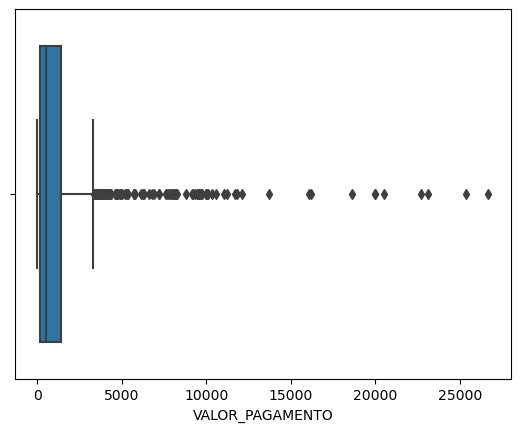

In [258]:
sns.boxplot(cartao2.VALOR_PAGAMENTO)

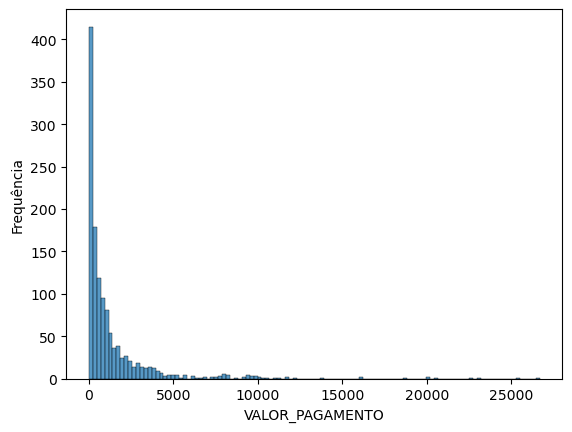

In [259]:
sns.histplot(cartao2.VALOR_PAGAMENTO)
plt.ylabel("Frequência")
plt.show()

# Oportunidades

 Inclusão de colunas que fornecessem mais dados acerca do cliente, de forma a desenvolver outras features interessantes, como renda, idade do cliente, comportamento dos limites de crédito, média do score do cliente dentro de um período de tempo, quantidade de acordos fechados e cumpridos, tempo do início da proposta até a aceitação do acordo. 

Pensando em um modelo que possa estimar o Expected Loss do Exposure at Default, essas variáveis seriam úteis da seguinte forma: 

+ Com a renda e o valor da dívida seria possível quantificar o impacto das dívidas totais no comprometimento da renda do cliente. 
+ A idade poderia servir como uma feature de peso para o modelo 
+ O histórico de perdas e ganhos de limites de crédito dão uma noção de como os bancos vêem a saúde financeira do cliente, também oportunizando a criação de uma variável com uma probabilidade associada à ser um bom ou mau pagador
+ A média do score do cliente em um período definido de tempo fornece uma visão além dos bancos sobre o comportamento do cliente enquanto pagador
+ A quantidade de acordos que o cliente aceitou e honrou pode nos fornecer informações acerca do comportamento esperado do cliente: às vezes o cliente passou por um momento de dificuldade, o que impactou na saúde financeira e consequentemente no seu score, mas é um cliente honesto e que está buscando ajustar suas finanças e honrar suas dívidas.
+ O tempo decorrido entre o início da proposta até a aceitação do acordo pode também servir como peso para o modelo. Além disso, pode ser um indicativo de que aquele cliente entende que alguns juros são abusivos e espera o melhor momento para quitar suas dívidas, de forma a honrar com um compromisso que em algum momento ele não teve condições, porém sem sofrer com juros altos.

 Em conjunto com as bases disponibilizadas, fazer uma análise outras variáveis que fornecem informações que compõem o Application Score e Behavior Score, de forma a entender quais valores (ou seus percentuais) estão em risco de não recebimento e o risco de inadimplência do cliente.

 Entender como se deu o impacto da pandemia na saúde financeira desses clientes com base em uma análise comparativa de momentos antes, durante e após a pandemia, de forma a conseguir criar propostas mais atrativas para a recuperação de crédito.

 Entender qual é a grande questão a ser sanada e atacar a criação de features com base nessas questões (Aumentar a receita recuperando o máximo de dinheiro possíivel? Reduzir as perdas recuperando algum dinheiro?). 

 Utilizar do conhecimento do mercado para alinhado à questão a ser sanada para a criação de features necessárias e condizentes com futuros modelos, de forma a respeitar o princípio da parcimônia.

 Entender o que, de fato, é outlier nas bases e verificar como tratar os valores *missing*.

